In [2]:
include("../src/MorporJ.jl")

Main.MorporJ

In [3]:
using LinearAlgebra, Plots
path = "/home/tobias/Documents/IPP/CIRM/morpor/MorporJ/training/mu_nw_0.030__mu_r_0.100__exponent_2__years_5.txt"
S = MorporJ.load_from_txt(path);
Nₜₚ = size(S)[2]
S = S[:,range(1, step=10, stop=Nₜₚ)]
nₜₚ = size(S)[2]
N = size(S)[1]
M = N
xgrid = collect(range(0, 1, length = N))
pgrid = collect(range(0, 1, length = M))
Δx = xgrid[2] - xgrid[1]

S₁ = zero(S)
# normalize
for i in 1:nₜₚ
    S₁[:,i] .= S[:,i]/(sum(S[:,i])*Δx)
end

# normalize non-uniform
#= m₀ = zeros(nₜₚ)
m₁ = zeros(nₜₚ)
for i in 1:nₜₚ
    m₀[i] = sum(S[:,i])*Δx
    m₁[i] = sum(S[:,i] .* xgrid )*Δx
    @. S₁[:,i] = S[:,i] * ( 1 + xgrid*(1-m₀[i])/m₁[i] )
end =#

In [4]:
s_pdf = [zeros(N) for i in 1:nₜₚ]
s_cdf = [zeros(N) for i in 1:nₜₚ]
s_icdf = [zeros(M) for i in 1:nₜₚ]
for i in 1:nₜₚ
    s_pdf[i] .= S₁[:,i]
    MorporJ.cdf!(s_cdf[i], s_pdf[i], Δx)
    MorporJ.icdf!(s_icdf[i], s_cdf[i], xgrid, pgrid)
end

In [10]:
a = [s_icdf[1], s_icdf[end]];

In [11]:
Λ, ΔW = MorporJ.barycenter_fit(s_icdf, a, Δx)

([[0.9999999999996714, 3.277015712615702e-13], [0.9911038561194174, 0.008896143880582469], [0.9818793658427876, 0.018120634157212503], [0.9727212619048724, 0.027278509468329732], [0.9635584759260656, 0.036441524073934375], [0.954426282517462, 0.045573717482537954], [0.9453119501415941, 0.0546880498584059], [0.9361812502186442, 0.06381874978135584], [0.927068052915228, 0.07293195576449918], [0.917953712243235, 0.08204631026661434]  …  [0.08176515299804941, 0.9182348470019503], [0.07268100230829531, 0.927318997115884], [0.06359891419838516, 0.9364010863379079], [0.054508596979483966, 0.9454914030205134], [0.04542434507711714, 0.9545756548922152], [0.03634033748053159, 0.9636596625197839], [0.027251589410760557, 0.9727484105925623], [0.018168089903610164, 0.9818319101924193], [0.009084126286935695, 0.9909158737151345], [-2.6410642970247684e-7, 1.0000002643704937]], [1.7874411511219958e-26, 1.5784977806541491e-7, 1.703388618313932e-7, 1.7178853174666626e-7, 1.6934677573954104e-7, 1.6399586

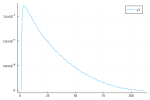

In [12]:
plot(ΔW)